<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/da_cv_fer_sfew_expw_v13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning repository
Importing files regarding dataset, model, mains and utils

In [1]:
!git clone https://github.com/scaairesearch/da_cv_fer
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 264 (delta 26), reused 0 (delta 0), pack-reused 209
Receiving objects: 100% (264/264), 11.84 MiB | 18.20 MiB/s, done.
Resolving deltas: 100% (140/140), done.


Installing dependencies

In [2]:
!pip install -q -r requirements.txt # -q is for quiet install
# for some reason the below does not get installed with requirements
!pip install -q opendatasets
!pip install -q facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

## Libraries and Initializations

In [3]:
# Installs from files
from da_cv_fer.data_config import DataConfig
from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_sfew_crop import DatasetSFEWCROP
from da_cv_fer.ds_expw_crop import EXPWCROP
from da_cv_fer.ds_expw import EXPW
from da_cv_fer.utils import *
from da_cv_fer.model_DANN import DANN
from da_cv_fer.model_DANN_Bespoke import DANNBespoke
from da_cv_fer.run_config import RunConfig
from da_cv_fer.train import *
import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np


### Initializing configs

In [4]:
#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

## SFEW Dataset

Creating dataloader objects.

It copies files from a google drive, unzips it and sets that for use

details: da_cv_fer.ds_sfew.DatasetSFEW

In [5]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# sfew = DatasetSFEW()
sfew = DatasetSFEWCROP()
sfew_train_loader, sfew_val_loader = sfew.get_dataloader()
print(f' length of SFEW dataset : {len(sfew_train_loader.dataset)}')

 self.BASE_PATH -dataset, 
 self.EXTRACT_DIR-dataset/sfew,
 self.ZIP_FILE_PATH - dataset/SFEW_2.zip 
Directory dataset/sfew created successfully.
No files (including zip file) found in dataset/sfew.Copying file
Starting File copying from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
File copied successfully from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
Initiating extraction of dataset/sfew/SFEW_2.zip to dataset/sfew
...completed for dataset/sfew/SFEW_2.zip
dataset/sfew/Train Happy.zip Happy
...completed for dataset/sfew/Train/Happy.zip
dataset/sfew/Train Sad.zip Sad
...completed for dataset/sfew/Train/Sad.zip
dataset/sfew/Train Angry.zip Angry
...completed for dataset/sfew/Train/Angry.zip
dataset/sfew/Train Disgust.zip Disgust
...completed for dataset/sfew/Train/Disgust.zip
dataset/sfew/Train Fear.zip Fear
...completed for dataset/sfew/Train/Fear.zip
dataset/sfew/Train Neutral.zip Neutral
...completed for dataset/sfew/Train/Neutral.zip
datas

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


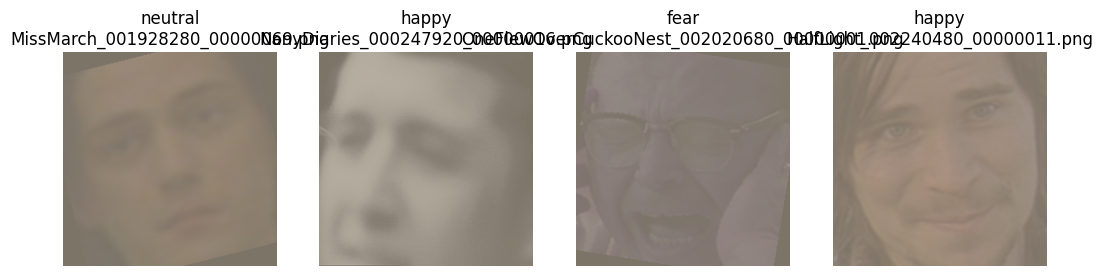

In [ ]:
show_batch(sfew_train_loader,sfew.labels,4)

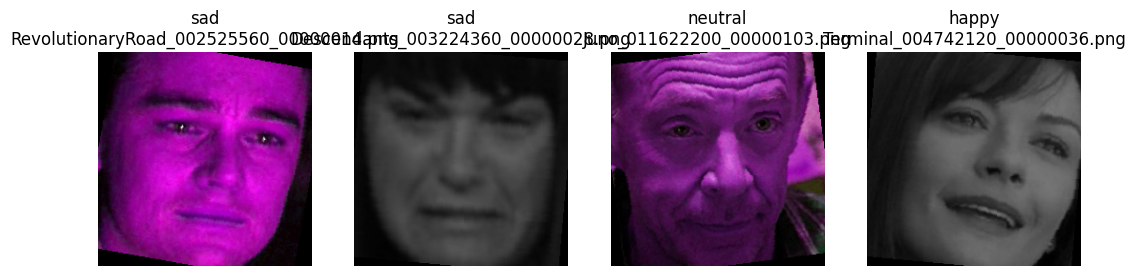

In [7]:
show_batch(sfew_train_loader,sfew.labels,4, normalized = False)

## EXPW Dataset
Creating dataset and dataloader objects.
Split into train and val.

`details: da_cv_fer.ds_expw.EXPW`
<br>
Please be patient, it takes around 3 minutes to download data set

In [8]:
# expw_obj = EXPW()
expw_obj = EXPWCROP()

expw_train_ds, expw_val_ds = expw_obj.get_dataset()
expw_train_loader, expw_val_loader = expw_obj.get_dataloader()
print(f' length of EXPW dataset : {len(expw_train_loader.dataset)} , {len(expw_train_ds)}')

desitination file path = dataset/expwds/expwds.zip
in EXPW()...
Directory dataset/expwds created successfully.


100%|██████████| 7.68G/7.68G [01:29<00:00, 92.1MB/s]



File downloaded successfully from https://www.kaggle.com/datasets/mohammedaaltaha/expwds to dataset/expwds/expwds.zip
Unzipped Files already exist in dataset/expwds, not extracted
Directory created: dataset/expwds/cropped
**** dataset/expwds/cropped is empty***

 
631 cropped images created in cropped
 length of EXPW dataset : 646 , 646


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


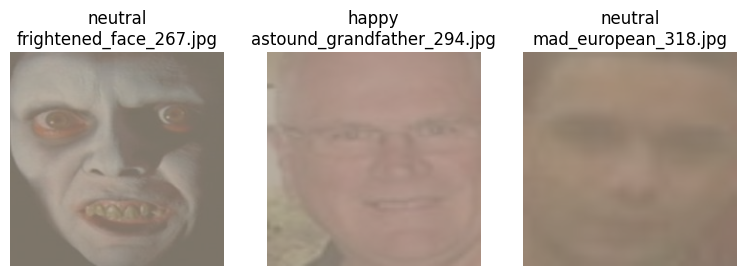

In [9]:
show_batch(expw_train_loader,expw_train_ds.labels,3)

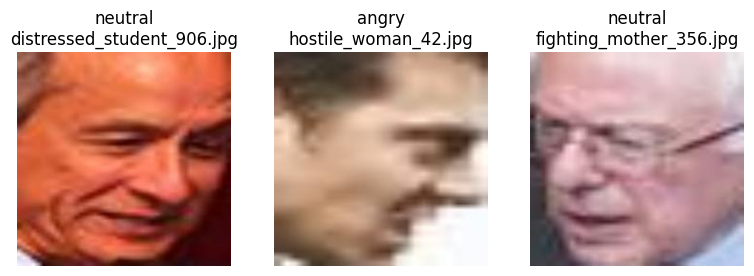

In [10]:
show_batch(expw_train_loader,expw_train_ds.labels,3, normalized = False)

## Creating Dataloaders for source and target

In [11]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }
data_loader = {'source' : sfew_loader}
source_name = data_loader['source']['name']


In [12]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }

expw_loader = {'name': 'expw',
               'train':expw_train_loader,
               'val':expw_val_loader
               }

data_loader = {'source' : sfew_loader,
               'target' : expw_loader}

source_name = data_loader['source']['name']
target_name = data_loader['target']['name']

## Initializing Model
details are present in `model_DANN`

In [14]:
model = DANNBespoke(num_classes=7,backbone='mobilenet', attention=False) #DANN(num_classes=7,backbone='resnet18', dropout=0.1)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 47.3MB/s]


feature extractor backbone created using mobilenet model


In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.to(device)

cuda


Running model for single run. checking output shapes

In [ ]:
for usage, dict_data_loader in data_loader.items(): ## {'source' : sfew_loader,'target' : expw_loader}
    print('-'*80)
    print(usage)
    for k, v in dict_data_loader.items(): # {'name': 'sfew','train':sfew_train_loader,'val':sfew_val_loader}
      if k == 'name':
        print (f'--------{k} of dataset : {v}--------')
      else:
        print (f'   --------type : {k}--------')
        batch = next(iter(v)) # it may be possible that some datasets have more than 2 outputs, so this strategy is safe
        images, labels = batch[0].to(device), batch[1].to(device)
        print( "Input:\n","Input Image: ",images.shape, ", labels: ",labels.shape)

        x_labels, x_domains, x_features = model(images) # forward pass
        print("Output:\n", "labels: ", x_labels.shape, ", domains: ",x_domains.shape, ", features: ", x_features.shape)


--------------------------------------------------------------------------------
source
--------name of dataset : sfew--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1280])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1280])
--------------------------------------------------------------------------------
target
--------name of dataset : expw--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1280])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , l

In [ ]:
# #@title Weight Initialization

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       nn.init.xavier_normal_(m.weight)
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight)
#       nn.init.zeros_(m.bias)

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       # nn.init.xavier_normal_(m.weight)
#       pass # not initialising Conv layers as they are pretrained
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight) # Linear layers are added on
#       nn.init.zeros_(m.bias)

## Non DANN: Training, Validating, Saving

### Early Stopping Scheduler - ReduceLRonPlateau

In [ ]:
# def early_stopping_difference(list_loss: list, patience = 5, difference = 0.0003):
#   if len(list_loss) > patience:
#     reverse_list_loss = list_loss[::-1]
#     reverse_list_loss = reverse_list_loss[0:patience+1]
#     for index in range(0,len(reverse_list_loss)-1):
#       if abs(reverse_list_loss[index] - reverse_list_loss[index+1]) > difference:
#         return False
#     return True
#   else:
#     return False

Configuration towards execution

In [ ]:
runconfig = RunConfig()
device = runconfig.device

non_dann_model = DANNBespoke(num_classes=7,backbone='mobilenet', attention=False) #DANN(num_classes=7, backbone = 'resnet18')
non_dann_model = non_dann_model.to(device)
best_non_dann_model = DANNBespoke(num_classes=7,backbone='mobilenet', attention=False)# DANN(num_classes=7, backbone = 'resnet18').to(device)
# non_dann_model.apply(weights_init) # initializing model, only linear layers

#learning rate
lr = float(runconfig.inital_lr)

# Epochs
EPOCHS = runconfig.NUM_EPOCHS
# EPOCHS = 5 #override
print("EPOCHS", EPOCHS)

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# optimizer
optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9)

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

# Initialize variables to track the best validation loss and the best model state
best_val_loss = float('inf')
best_val_acc = 0
best_model_state = None

# loss functions
criterion_class = (runconfig.criterion_class).to(device=device)
criterion_domain = (runconfig.criterion_domain).to(device=device)

# loss accumulation
train_losses = [] # to capture train losses over training epochs
val_losses = [] # to capture validation loss over epochs
lr_schedule = [] # to capture learning rate over epochs
epoch_converge = 0 #TODO: run config based

feature extractor backbone created using mobilenet model
feature extractor backbone created using mobilenet model
EPOCHS 100


In [ ]:
# Training block
print('------ Training started for Non DANN Model ---- ')
print(f'starting LR : {lr}')
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, " of ", EPOCHS)

    #Train Model
    avg_epoch_loss, curr_lr = train_model(model = non_dann_model,
                                          device = device,
                                          data_loader = data_loader['source']['train'],
                                          optimizer = optimizer,
                                          epoch = epoch,
                                          class_loss_function = criterion_class)
    train_losses.append(avg_epoch_loss)
    lr_schedule.append(curr_lr)

    #Adding Scheduler #TODO: ADD SCHEDULER
    scheduler.step(avg_epoch_loss) #applying scheduler on training loss

    #Validate Model
    correct, avg_epoch_val_loss = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'],
                                    class_loss_function = criterion_class
                                    )

    val_losses.append(avg_epoch_val_loss)
    # # Check if the current model has the best validation loss
    # print(f'Last Epoch Val Loss = {avg_epoch_val_loss} | Best Val Loss = {best_val_loss}' )
    # if avg_epoch_val_loss < best_val_loss:
    #   best_val_loss = avg_epoch_val_loss
    #   # save the current model state as the best model state
    #   best_model_state = deepcopy(non_dann_model.state_dict())
    #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

    # check if the current model has the best accuracy
    print (f'last correct ={correct} | best correct = {best_val_acc}')
    if correct > best_val_acc:
      best_val_acc = correct
      # save the current model state as the best model state
      best_model_state = deepcopy(non_dann_model.state_dict())
      print(f'Updated the best model with correct: {correct}\n')


    if early_stopping_difference(val_losses,
                                 patience = early_stop_patience,
                                 difference= early_stop_difference):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break

## using params of best model to update model
if best_model_state: # only update if best model has been saved, else the last one would be picked up
  # best_non_dann_model.load_state_dict(best_model_state)
  non_dann_model.load_state_dict(best_model_state)
  print('Best model loaded')


print(f'Validation results with {source_name}')

correct, test_loss_source = test_model(model= non_dann_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'], # source val loader
                                    class_loss_function = criterion_class)

print(f'Test results with {target_name}')
correct, test_loss_target = test_model(model= non_dann_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['target']['val'], # target val loader
                                    class_loss_function = criterion_class)

dict_non_dann_losses = {'train_losses' : train_losses,
                                       'val_losses': val_losses,
                                       'test_loss_source' : test_loss_source,
                                       'test_loss_target' : test_loss_target,
                                       'epoch_convergence' : epoch_converge,
                                       'lr': lr_schedule}




------ Training started for Non DANN Model ---- 
starting LR : 0.005
EPOCH: 1  of  100
epoch = 1...in training function


Loss=1.5387399196624756 Accuracy=185/913(20.26%) Epoch Avg loss=0.12019217 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.44it/s]


Test / Val: Average loss: 0.1224, Accuracy: 73/419 (17.42%)

last correct =73 | best correct = 0
Updated the best model with correct: 73

EPOCH: 2  of  100
epoch = 2...in training function


Loss=1.6611957550048828 Accuracy=211/913(23.11%) Epoch Avg loss=0.11871998 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.57it/s]


Test / Val: Average loss: 0.1224, Accuracy: 73/419 (17.42%)

last correct =73 | best correct = 73
EPOCH: 3  of  100
epoch = 3...in training function


Loss=2.439404010772705 Accuracy=222/913(24.32%) Epoch Avg loss=0.11824675 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.53it/s]


Test / Val: Average loss: 0.1216, Accuracy: 75/419 (17.90%)

last correct =75 | best correct = 73
Updated the best model with correct: 75

EPOCH: 4  of  100
epoch = 4...in training function


Loss=1.7886712551116943 Accuracy=247/913(27.05%) Epoch Avg loss=0.11566895 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.66it/s]


Test / Val: Average loss: 0.1212, Accuracy: 81/419 (19.33%)

last correct =81 | best correct = 75
Updated the best model with correct: 81

EPOCH: 5  of  100
epoch = 5...in training function


Loss=1.4460248947143555 Accuracy=292/913(31.98%) Epoch Avg loss=0.11065813 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  6.11it/s]


Test / Val: Average loss: 0.1184, Accuracy: 101/419 (24.11%)

last correct =101 | best correct = 81
Updated the best model with correct: 101

EPOCH: 6  of  100
epoch = 6...in training function


Loss=1.5966943502426147 Accuracy=305/913(33.41%) Epoch Avg loss=0.10610850 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.66it/s]


Test / Val: Average loss: 0.1166, Accuracy: 119/419 (28.40%)

last correct =119 | best correct = 101
Updated the best model with correct: 119

EPOCH: 7  of  100
epoch = 7...in training function


Loss=2.565028190612793 Accuracy=356/913(38.99%) Epoch Avg loss=0.10221696 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.54it/s]


Test / Val: Average loss: 0.1134, Accuracy: 130/419 (31.03%)

last correct =130 | best correct = 119
Updated the best model with correct: 130

EPOCH: 8  of  100
epoch = 8...in training function


Loss=1.3189669847488403 Accuracy=387/913(42.39%) Epoch Avg loss=0.09582397 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  5.97it/s]


Test / Val: Average loss: 0.1141, Accuracy: 142/419 (33.89%)

last correct =142 | best correct = 130
Updated the best model with correct: 142

EPOCH: 9  of  100
epoch = 9...in training function


Loss=1.2641921043395996 Accuracy=428/913(46.88%) Epoch Avg loss=0.09184978 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.58it/s]


Test / Val: Average loss: 0.1196, Accuracy: 130/419 (31.03%)

last correct =130 | best correct = 142
EPOCH: 10  of  100
epoch = 10...in training function


Loss=2.0929927825927734 Accuracy=440/913(48.19%) Epoch Avg loss=0.08883652 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.45it/s]


Test / Val: Average loss: 0.1143, Accuracy: 140/419 (33.41%)

last correct =140 | best correct = 142
EPOCH: 11  of  100
epoch = 11...in training function


Loss=1.9952691793441772 Accuracy=479/913(52.46%) Epoch Avg loss=0.08706741 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.54it/s]


Test / Val: Average loss: 0.1092, Accuracy: 159/419 (37.95%)

last correct =159 | best correct = 142
Updated the best model with correct: 159

EPOCH: 12  of  100
epoch = 12...in training function


Loss=1.5899065732955933 Accuracy=480/913(52.57%) Epoch Avg loss=0.08167103 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.46it/s]


Test / Val: Average loss: 0.1133, Accuracy: 137/419 (32.70%)

last correct =137 | best correct = 159
EPOCH: 13  of  100
epoch = 13...in training function


Loss=2.304819107055664 Accuracy=523/913(57.28%) Epoch Avg loss=0.07762592 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1103, Accuracy: 150/419 (35.80%)

last correct =150 | best correct = 159
EPOCH: 14  of  100
epoch = 14...in training function


Loss=2.0211081504821777 Accuracy=566/913(61.99%) Epoch Avg loss=0.07092508 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.55it/s]


Test / Val: Average loss: 0.1312, Accuracy: 141/419 (33.65%)

last correct =141 | best correct = 159
EPOCH: 15  of  100
epoch = 15...in training function


Loss=1.6370794773101807 Accuracy=570/913(62.43%) Epoch Avg loss=0.06834100 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.57it/s]


Test / Val: Average loss: 0.1205, Accuracy: 147/419 (35.08%)

last correct =147 | best correct = 159
EPOCH: 16  of  100
epoch = 16...in training function


Loss=1.1173946857452393 Accuracy=586/913(64.18%) Epoch Avg loss=0.06547047 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  6.25it/s]


Test / Val: Average loss: 0.1115, Accuracy: 182/419 (43.44%)

last correct =182 | best correct = 159
Updated the best model with correct: 182

EPOCH: 17  of  100
epoch = 17...in training function


Loss=1.515765905380249 Accuracy=588/913(64.40%) Epoch Avg loss=0.06418067 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.63it/s]


Test / Val: Average loss: 0.1097, Accuracy: 169/419 (40.33%)

last correct =169 | best correct = 182
EPOCH: 18  of  100
epoch = 18...in training function


Loss=1.0915038585662842 Accuracy=597/913(65.39%) Epoch Avg loss=0.05997269 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.48it/s]


Test / Val: Average loss: 0.1121, Accuracy: 189/419 (45.11%)

last correct =189 | best correct = 182
Updated the best model with correct: 189

EPOCH: 19  of  100
epoch = 19...in training function


Loss=1.387712001800537 Accuracy=666/913(72.95%) Epoch Avg loss=0.04963399 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.52it/s]


Test / Val: Average loss: 0.1172, Accuracy: 161/419 (38.42%)

last correct =161 | best correct = 189
EPOCH: 20  of  100
epoch = 20...in training function


Loss=2.713430404663086 Accuracy=707/913(77.44%) Epoch Avg loss=0.04588699 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.63it/s]


Test / Val: Average loss: 0.1174, Accuracy: 187/419 (44.63%)

last correct =187 | best correct = 189
EPOCH: 21  of  100
epoch = 21...in training function


Loss=1.5932872295379639 Accuracy=681/913(74.59%) Epoch Avg loss=0.04768818 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.61it/s]


Test / Val: Average loss: 0.1324, Accuracy: 159/419 (37.95%)

last correct =159 | best correct = 189
EPOCH: 22  of  100
epoch = 22...in training function


Loss=0.7431052327156067 Accuracy=709/913(77.66%) Epoch Avg loss=0.04179270 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  5.94it/s]


Test / Val: Average loss: 0.1264, Accuracy: 169/419 (40.33%)

last correct =169 | best correct = 189
EPOCH: 23  of  100
epoch = 23...in training function


Loss=1.71347177028656 Accuracy=693/913(75.90%) Epoch Avg loss=0.04469802 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.66it/s]


Test / Val: Average loss: 0.1384, Accuracy: 163/419 (38.90%)

last correct =163 | best correct = 189
EPOCH: 24  of  100
epoch = 24...in training function


Loss=0.6310716867446899 Accuracy=694/913(76.01%) Epoch Avg loss=0.04399111 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.54it/s]


Test / Val: Average loss: 0.1570, Accuracy: 150/419 (35.80%)

last correct =150 | best correct = 189
EPOCH: 25  of  100
epoch = 25...in training function


Loss=0.876930832862854 Accuracy=750/913(82.15%) Epoch Avg loss=0.03455707 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  6.30it/s]


Test / Val: Average loss: 0.1391, Accuracy: 165/419 (39.38%)

last correct =165 | best correct = 189
EPOCH: 26  of  100
epoch = 26...in training function


Loss=1.6952307224273682 Accuracy=739/913(80.94%) Epoch Avg loss=0.03642189 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.61it/s]


Test / Val: Average loss: 0.1520, Accuracy: 151/419 (36.04%)

last correct =151 | best correct = 189
EPOCH: 27  of  100
epoch = 27...in training function


Loss=2.4644510746002197 Accuracy=747/913(81.82%) Epoch Avg loss=0.03545104 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.57it/s]


Test / Val: Average loss: 0.1347, Accuracy: 172/419 (41.05%)

last correct =172 | best correct = 189
EPOCH: 28  of  100
epoch = 28...in training function


Loss=3.551438331604004 Accuracy=777/913(85.10%) Epoch Avg loss=0.03176666 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.52it/s]


Test / Val: Average loss: 0.1373, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 189
EPOCH: 29  of  100
epoch = 29...in training function


Loss=2.10840106010437 Accuracy=778/913(85.21%) Epoch Avg loss=0.02952262 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.38it/s]


Test / Val: Average loss: 0.1417, Accuracy: 155/419 (36.99%)

last correct =155 | best correct = 189
EPOCH: 30  of  100
epoch = 30...in training function


Loss=2.042943000793457 Accuracy=771/913(84.45%) Epoch Avg loss=0.03019505 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.65it/s]


Test / Val: Average loss: 0.1491, Accuracy: 151/419 (36.04%)

last correct =151 | best correct = 189
EPOCH: 31  of  100
epoch = 31...in training function


Loss=1.1247961521148682 Accuracy=806/913(88.28%) Epoch Avg loss=0.02425458 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  5.83it/s]


Test / Val: Average loss: 0.1527, Accuracy: 176/419 (42.00%)

last correct =176 | best correct = 189
EPOCH: 32  of  100
epoch = 32...in training function


Loss=1.3926060199737549 Accuracy=792/913(86.75%) Epoch Avg loss=0.02637652 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.57it/s]


Test / Val: Average loss: 0.1507, Accuracy: 173/419 (41.29%)

last correct =173 | best correct = 189
EPOCH: 33  of  100
epoch = 33...in training function


Loss=1.8019390106201172 Accuracy=810/913(88.72%) Epoch Avg loss=0.02430952 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.64it/s]


Test / Val: Average loss: 0.1628, Accuracy: 167/419 (39.86%)

last correct =167 | best correct = 189
EPOCH: 34  of  100
epoch = 34...in training function


Loss=1.4230884313583374 Accuracy=823/913(90.14%) Epoch Avg loss=0.02164601 LR=0.005000: 100%|██████████| 58/58 [00:09<00:00,  6.11it/s]


Test / Val: Average loss: 0.1601, Accuracy: 173/419 (41.29%)

last correct =173 | best correct = 189
EPOCH: 35  of  100
epoch = 35...in training function


Loss=0.7323460578918457 Accuracy=822/913(90.03%) Epoch Avg loss=0.01870050 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.58it/s]


Test / Val: Average loss: 0.1452, Accuracy: 163/419 (38.90%)

last correct =163 | best correct = 189
EPOCH: 36  of  100
epoch = 36...in training function


Loss=3.4958953857421875 Accuracy=827/913(90.58%) Epoch Avg loss=0.02056075 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.52it/s]


Test / Val: Average loss: 0.1520, Accuracy: 180/419 (42.96%)

last correct =180 | best correct = 189
EPOCH: 37  of  100
epoch = 37...in training function


Loss=1.6389939785003662 Accuracy=814/913(89.16%) Epoch Avg loss=0.02268864 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.49it/s]


Test / Val: Average loss: 0.1692, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 189
EPOCH: 38  of  100
epoch = 38...in training function


Loss=1.3174805641174316 Accuracy=813/913(89.05%) Epoch Avg loss=0.02164802 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.49it/s]


Test / Val: Average loss: 0.1425, Accuracy: 184/419 (43.91%)

last correct =184 | best correct = 189
EPOCH: 39  of  100
epoch = 39...in training function


Loss=0.9467617869377136 Accuracy=826/913(90.47%) Epoch Avg loss=0.01902846 LR=0.005000: 100%|██████████| 58/58 [00:10<00:00,  5.74it/s]

Epoch 00039: reducing learning rate of group 0 to 1.0000e-03.


Test / Val: Average loss: 0.1698, Accuracy: 169/419 (40.33%)

last correct =169 | best correct = 189
EPOCH: 40  of  100
epoch = 40...in training function


Loss=2.791414976119995 Accuracy=850/913(93.10%) Epoch Avg loss=0.01580087 LR=0.001000: 100%|██████████| 58/58 [00:08<00:00,  6.65it/s]


Test / Val: Average loss: 0.1531, Accuracy: 190/419 (45.35%)

last correct =190 | best correct = 189
Updated the best model with correct: 190

EPOCH: 41  of  100
epoch = 41...in training function


Loss=0.2218208909034729 Accuracy=858/913(93.98%) Epoch Avg loss=0.01172896 LR=0.001000: 100%|██████████| 58/58 [00:08<00:00,  6.53it/s]


Test / Val: Average loss: 0.1574, Accuracy: 186/419 (44.39%)

last correct =186 | best correct = 190
EPOCH: 42  of  100
epoch = 42...in training function


Loss=1.9188792705535889 Accuracy=879/913(96.28%) Epoch Avg loss=0.00952799 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.27it/s]


Test / Val: Average loss: 0.1515, Accuracy: 172/419 (41.05%)

last correct =172 | best correct = 190
EPOCH: 43  of  100
epoch = 43...in training function


Loss=0.23108740150928497 Accuracy=879/913(96.28%) Epoch Avg loss=0.00743252 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  5.84it/s]


Test / Val: Average loss: 0.1689, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 44  of  100
epoch = 44...in training function


Loss=1.0953978300094604 Accuracy=873/913(95.62%) Epoch Avg loss=0.00934593 LR=0.001000: 100%|██████████| 58/58 [00:10<00:00,  5.51it/s]


Test / Val: Average loss: 0.1623, Accuracy: 168/419 (40.10%)

last correct =168 | best correct = 190
EPOCH: 45  of  100
epoch = 45...in training function


Loss=2.411139488220215 Accuracy=876/913(95.95%) Epoch Avg loss=0.01020629 LR=0.001000: 100%|██████████| 58/58 [00:10<00:00,  5.61it/s]


Test / Val: Average loss: 0.1586, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 190
EPOCH: 46  of  100
epoch = 46...in training function


Loss=0.49129852652549744 Accuracy=882/913(96.60%) Epoch Avg loss=0.00700991 LR=0.001000: 100%|██████████| 58/58 [00:10<00:00,  5.47it/s]


Test / Val: Average loss: 0.1727, Accuracy: 162/419 (38.66%)

last correct =162 | best correct = 190
EPOCH: 47  of  100
epoch = 47...in training function


Loss=0.3477109670639038 Accuracy=875/913(95.84%) Epoch Avg loss=0.00830067 LR=0.001000: 100%|██████████| 58/58 [00:10<00:00,  5.47it/s]


Test / Val: Average loss: 0.1518, Accuracy: 183/419 (43.68%)

last correct =183 | best correct = 190
EPOCH: 48  of  100
epoch = 48...in training function


Loss=3.1050667762756348 Accuracy=889/913(97.37%) Epoch Avg loss=0.00797519 LR=0.001000: 100%|██████████| 58/58 [00:10<00:00,  5.59it/s]


Test / Val: Average loss: 0.1528, Accuracy: 179/419 (42.72%)

last correct =179 | best correct = 190
EPOCH: 49  of  100
epoch = 49...in training function


Loss=1.2476094961166382 Accuracy=881/913(96.50%) Epoch Avg loss=0.00740138 LR=0.001000: 100%|██████████| 58/58 [00:08<00:00,  6.63it/s]


Test / Val: Average loss: 0.1593, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 50  of  100
epoch = 50...in training function


Loss=1.8553637266159058 Accuracy=885/913(96.93%) Epoch Avg loss=0.00755778 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.36it/s]

Epoch 00050: reducing learning rate of group 0 to 2.0000e-04.


Test / Val: Average loss: 0.1637, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 190
EPOCH: 51  of  100
epoch = 51...in training function


Loss=0.6905033588409424 Accuracy=885/913(96.93%) Epoch Avg loss=0.00699933 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.42it/s]


Test / Val: Average loss: 0.1649, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 52  of  100
epoch = 52...in training function


Loss=0.11966244131326675 Accuracy=894/913(97.92%) Epoch Avg loss=0.00402770 LR=0.000200: 100%|██████████| 58/58 [00:10<00:00,  5.72it/s]


Test / Val: Average loss: 0.1637, Accuracy: 179/419 (42.72%)

last correct =179 | best correct = 190
EPOCH: 53  of  100
epoch = 53...in training function


Loss=1.037813663482666 Accuracy=887/913(97.15%) Epoch Avg loss=0.00687835 LR=0.000200: 100%|██████████| 58/58 [00:10<00:00,  5.44it/s]


Test / Val: Average loss: 0.1598, Accuracy: 185/419 (44.15%)

last correct =185 | best correct = 190
EPOCH: 54  of  100
epoch = 54...in training function


Loss=1.5129458904266357 Accuracy=890/913(97.48%) Epoch Avg loss=0.00614354 LR=0.000200: 100%|██████████| 58/58 [00:10<00:00,  5.50it/s]


Test / Val: Average loss: 0.1700, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 190
EPOCH: 55  of  100
epoch = 55...in training function


Loss=1.3328834772109985 Accuracy=897/913(98.25%) Epoch Avg loss=0.00591492 LR=0.000200: 100%|██████████| 58/58 [00:10<00:00,  5.39it/s]


Test / Val: Average loss: 0.1755, Accuracy: 170/419 (40.57%)

last correct =170 | best correct = 190
EPOCH: 56  of  100
epoch = 56...in training function


Loss=0.5232776403427124 Accuracy=890/913(97.48%) Epoch Avg loss=0.00588423 LR=0.000200: 100%|██████████| 58/58 [00:10<00:00,  5.50it/s]

Epoch 00056: reducing learning rate of group 0 to 4.0000e-05.


Test / Val: Average loss: 0.1685, Accuracy: 167/419 (39.86%)

last correct =167 | best correct = 190
EPOCH: 57  of  100
epoch = 57...in training function


Loss=0.4809093475341797 Accuracy=881/913(96.50%) Epoch Avg loss=0.00613239 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  5.97it/s]


Test / Val: Average loss: 0.1665, Accuracy: 172/419 (41.05%)

last correct =172 | best correct = 190
EPOCH: 58  of  100
epoch = 58...in training function


Loss=0.10607720911502838 Accuracy=885/913(96.93%) Epoch Avg loss=0.00485355 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.43it/s]


Test / Val: Average loss: 0.1695, Accuracy: 170/419 (40.57%)

last correct =170 | best correct = 190
EPOCH: 59  of  100
epoch = 59...in training function


Loss=1.3887786865234375 Accuracy=888/913(97.26%) Epoch Avg loss=0.00645859 LR=0.000040: 100%|██████████| 58/58 [00:08<00:00,  6.56it/s]


Test / Val: Average loss: 0.1712, Accuracy: 179/419 (42.72%)

last correct =179 | best correct = 190
EPOCH: 60  of  100
epoch = 60...in training function


Loss=0.17393192648887634 Accuracy=896/913(98.14%) Epoch Avg loss=0.00359782 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.20it/s]


Test / Val: Average loss: 0.1582, Accuracy: 174/419 (41.53%)

last correct =174 | best correct = 190
EPOCH: 61  of  100
epoch = 61...in training function


Loss=0.6842840313911438 Accuracy=898/913(98.36%) Epoch Avg loss=0.00454255 LR=0.000040: 100%|██████████| 58/58 [00:10<00:00,  5.79it/s]


Test / Val: Average loss: 0.1614, Accuracy: 174/419 (41.53%)

last correct =174 | best correct = 190
EPOCH: 62  of  100
epoch = 62...in training function


Loss=0.5556979775428772 Accuracy=890/913(97.48%) Epoch Avg loss=0.00609104 LR=0.000040: 100%|██████████| 58/58 [00:10<00:00,  5.44it/s]


Test / Val: Average loss: 0.1684, Accuracy: 172/419 (41.05%)

last correct =172 | best correct = 190
EPOCH: 63  of  100
epoch = 63...in training function


Loss=1.1752281188964844 Accuracy=891/913(97.59%) Epoch Avg loss=0.00565577 LR=0.000040: 100%|██████████| 58/58 [00:10<00:00,  5.63it/s]


Test / Val: Average loss: 0.1618, Accuracy: 183/419 (43.68%)

last correct =183 | best correct = 190
EPOCH: 64  of  100
epoch = 64...in training function


Loss=0.25131627917289734 Accuracy=889/913(97.37%) Epoch Avg loss=0.00511428 LR=0.000040: 100%|██████████| 58/58 [00:10<00:00,  5.48it/s]

Epoch 00064: reducing learning rate of group 0 to 8.0000e-06.


Test / Val: Average loss: 0.1693, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 190
EPOCH: 65  of  100
epoch = 65...in training function


Loss=1.1745953559875488 Accuracy=890/913(97.48%) Epoch Avg loss=0.00584619 LR=0.000008: 100%|██████████| 58/58 [00:10<00:00,  5.48it/s]


Test / Val: Average loss: 0.1766, Accuracy: 176/419 (42.00%)

last correct =176 | best correct = 190
EPOCH: 66  of  100
epoch = 66...in training function


Loss=2.8694779872894287 Accuracy=893/913(97.81%) Epoch Avg loss=0.00737733 LR=0.000008: 100%|██████████| 58/58 [00:10<00:00,  5.51it/s]


Test / Val: Average loss: 0.1615, Accuracy: 180/419 (42.96%)

last correct =180 | best correct = 190
EPOCH: 67  of  100
epoch = 67...in training function


Loss=1.9891200065612793 Accuracy=896/913(98.14%) Epoch Avg loss=0.00605952 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  5.97it/s]


Test / Val: Average loss: 0.1684, Accuracy: 182/419 (43.44%)

last correct =182 | best correct = 190
EPOCH: 68  of  100
epoch = 68...in training function


Loss=1.6402385234832764 Accuracy=890/913(97.48%) Epoch Avg loss=0.00613828 LR=0.000008: 100%|██████████| 58/58 [00:08<00:00,  6.59it/s]

Epoch 00068: reducing learning rate of group 0 to 1.6000e-06.


Test / Val: Average loss: 0.1642, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 190
EPOCH: 69  of  100
epoch = 69...in training function


Loss=1.1658953428268433 Accuracy=883/913(96.71%) Epoch Avg loss=0.00647767 LR=0.000002: 100%|██████████| 58/58 [00:09<00:00,  6.38it/s]


Test / Val: Average loss: 0.1749, Accuracy: 178/419 (42.48%)

last correct =178 | best correct = 190
EPOCH: 70  of  100
epoch = 70...in training function


Loss=0.9910565614700317 Accuracy=897/913(98.25%) Epoch Avg loss=0.00512843 LR=0.000002: 100%|██████████| 58/58 [00:09<00:00,  6.24it/s]


Test / Val: Average loss: 0.1631, Accuracy: 172/419 (41.05%)

last correct =172 | best correct = 190
EPOCH: 71  of  100
epoch = 71...in training function


Loss=1.0780930519104004 Accuracy=899/913(98.47%) Epoch Avg loss=0.00460281 LR=0.000002: 100%|██████████| 58/58 [00:09<00:00,  5.95it/s]


Test / Val: Average loss: 0.1704, Accuracy: 174/419 (41.53%)

last correct =174 | best correct = 190
EPOCH: 72  of  100
epoch = 72...in training function


Loss=1.2558108568191528 Accuracy=895/913(98.03%) Epoch Avg loss=0.00536349 LR=0.000002: 100%|██████████| 58/58 [00:10<00:00,  5.52it/s]

Epoch 00072: reducing learning rate of group 0 to 1.0000e-06.


Test / Val: Average loss: 0.1626, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 190
EPOCH: 73  of  100
epoch = 73...in training function


Loss=1.7607035636901855 Accuracy=892/913(97.70%) Epoch Avg loss=0.00626054 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.58it/s]


Test / Val: Average loss: 0.1708, Accuracy: 178/419 (42.48%)

last correct =178 | best correct = 190
EPOCH: 74  of  100
epoch = 74...in training function


Loss=1.3005752563476562 Accuracy=891/913(97.59%) Epoch Avg loss=0.00587138 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.48it/s]


Test / Val: Average loss: 0.1614, Accuracy: 182/419 (43.44%)

last correct =182 | best correct = 190
EPOCH: 75  of  100
epoch = 75...in training function


Loss=1.0388922691345215 Accuracy=894/913(97.92%) Epoch Avg loss=0.00551116 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.48it/s]


Test / Val: Average loss: 0.1636, Accuracy: 180/419 (42.96%)

last correct =180 | best correct = 190
EPOCH: 76  of  100
epoch = 76...in training function


Loss=2.5331220626831055 Accuracy=898/913(98.36%) Epoch Avg loss=0.00589914 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.71it/s]


Test / Val: Average loss: 0.1713, Accuracy: 183/419 (43.68%)

last correct =183 | best correct = 190
EPOCH: 77  of  100
epoch = 77...in training function


Loss=0.8895777463912964 Accuracy=895/913(98.03%) Epoch Avg loss=0.00578088 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  6.41it/s]


Test / Val: Average loss: 0.1740, Accuracy: 169/419 (40.33%)

last correct =169 | best correct = 190
EPOCH: 78  of  100
epoch = 78...in training function


Loss=0.25976917147636414 Accuracy=896/913(98.14%) Epoch Avg loss=0.00456207 LR=0.000001: 100%|██████████| 58/58 [00:08<00:00,  6.63it/s]


Test / Val: Average loss: 0.1667, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 190
EPOCH: 79  of  100
epoch = 79...in training function


Loss=0.35850802063941956 Accuracy=891/913(97.59%) Epoch Avg loss=0.00602185 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  6.30it/s]


Test / Val: Average loss: 0.1783, Accuracy: 169/419 (40.33%)

last correct =169 | best correct = 190
EPOCH: 80  of  100
epoch = 80...in training function


Loss=0.8405758738517761 Accuracy=893/913(97.81%) Epoch Avg loss=0.00479326 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  5.86it/s]


Test / Val: Average loss: 0.1722, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 81  of  100
epoch = 81...in training function


Loss=1.4243162870407104 Accuracy=896/913(98.14%) Epoch Avg loss=0.00607948 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.37it/s]


Test / Val: Average loss: 0.1719, Accuracy: 176/419 (42.00%)

last correct =176 | best correct = 190
EPOCH: 82  of  100
epoch = 82...in training function


Loss=0.26036107540130615 Accuracy=899/913(98.47%) Epoch Avg loss=0.00373238 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.39it/s]


Test / Val: Average loss: 0.1587, Accuracy: 174/419 (41.53%)

last correct =174 | best correct = 190
EPOCH: 83  of  100
epoch = 83...in training function


Loss=2.1147446632385254 Accuracy=899/913(98.47%) Epoch Avg loss=0.00591002 LR=0.000001: 100%|██████████| 58/58 [00:11<00:00,  5.12it/s]


Test / Val: Average loss: 0.1617, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 190
EPOCH: 84  of  100
epoch = 84...in training function


Loss=0.028655847534537315 Accuracy=895/913(98.03%) Epoch Avg loss=0.00379997 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.52it/s]


Test / Val: Average loss: 0.1630, Accuracy: 176/419 (42.00%)

last correct =176 | best correct = 190
EPOCH: 85  of  100
epoch = 85...in training function


Loss=0.9777689576148987 Accuracy=889/913(97.37%) Epoch Avg loss=0.00562157 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  5.83it/s]


Test / Val: Average loss: 0.1636, Accuracy: 174/419 (41.53%)

last correct =174 | best correct = 190
EPOCH: 86  of  100
epoch = 86...in training function


Loss=1.2478229999542236 Accuracy=897/913(98.25%) Epoch Avg loss=0.00557544 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  6.28it/s]


Test / Val: Average loss: 0.1678, Accuracy: 173/419 (41.29%)

last correct =173 | best correct = 190
EPOCH: 87  of  100
epoch = 87...in training function


Loss=0.9331952929496765 Accuracy=898/913(98.36%) Epoch Avg loss=0.00460956 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  6.42it/s]


Test / Val: Average loss: 0.1718, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 88  of  100
epoch = 88...in training function


Loss=0.3884461522102356 Accuracy=893/913(97.81%) Epoch Avg loss=0.00503386 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  6.02it/s]


Test / Val: Average loss: 0.1572, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 190
EPOCH: 89  of  100
epoch = 89...in training function


Loss=1.747084617614746 Accuracy=890/913(97.48%) Epoch Avg loss=0.00655374 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  5.92it/s]


Test / Val: Average loss: 0.1634, Accuracy: 173/419 (41.29%)

last correct =173 | best correct = 190
EPOCH: 90  of  100
epoch = 90...in training function


Loss=0.22119022905826569 Accuracy=887/913(97.15%) Epoch Avg loss=0.00601323 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.38it/s]


Test / Val: Average loss: 0.1583, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 91  of  100
epoch = 91...in training function


Loss=0.15493160486221313 Accuracy=898/913(98.36%) Epoch Avg loss=0.00439163 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.47it/s]


Test / Val: Average loss: 0.1580, Accuracy: 180/419 (42.96%)

last correct =180 | best correct = 190
EPOCH: 92  of  100
epoch = 92...in training function


Loss=1.365022897720337 Accuracy=899/913(98.47%) Epoch Avg loss=0.00465574 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.54it/s]


Test / Val: Average loss: 0.1689, Accuracy: 180/419 (42.96%)

last correct =180 | best correct = 190
EPOCH: 93  of  100
epoch = 93...in training function


Loss=0.14594672620296478 Accuracy=894/913(97.92%) Epoch Avg loss=0.00419006 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.42it/s]


Test / Val: Average loss: 0.1716, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 190
EPOCH: 94  of  100
epoch = 94...in training function


Loss=0.6913835406303406 Accuracy=896/913(98.14%) Epoch Avg loss=0.00457831 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.44it/s]


Test / Val: Average loss: 0.1700, Accuracy: 183/419 (43.68%)

last correct =183 | best correct = 190
EPOCH: 95  of  100
epoch = 95...in training function


Loss=1.818536639213562 Accuracy=898/913(98.36%) Epoch Avg loss=0.00625298 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  5.99it/s]


Test / Val: Average loss: 0.1691, Accuracy: 174/419 (41.53%)

last correct =174 | best correct = 190
EPOCH: 96  of  100
epoch = 96...in training function


Loss=1.034878134727478 Accuracy=893/913(97.81%) Epoch Avg loss=0.00579422 LR=0.000001: 100%|██████████| 58/58 [00:08<00:00,  6.54it/s]


Test / Val: Average loss: 0.1667, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 97  of  100
epoch = 97...in training function


Loss=0.31576353311538696 Accuracy=895/913(98.03%) Epoch Avg loss=0.00462933 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  6.37it/s]


Test / Val: Average loss: 0.1737, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 190
EPOCH: 98  of  100
epoch = 98...in training function


Loss=0.27700111269950867 Accuracy=897/913(98.25%) Epoch Avg loss=0.00480647 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  6.17it/s]


Test / Val: Average loss: 0.1625, Accuracy: 180/419 (42.96%)

last correct =180 | best correct = 190
EPOCH: 99  of  100
epoch = 99...in training function


Loss=0.4716540575027466 Accuracy=894/913(97.92%) Epoch Avg loss=0.00500490 LR=0.000001: 100%|██████████| 58/58 [00:09<00:00,  5.82it/s]


Test / Val: Average loss: 0.1665, Accuracy: 171/419 (40.81%)

last correct =171 | best correct = 190
EPOCH: 100  of  100
epoch = 100...in training function


Loss=1.8481013774871826 Accuracy=890/913(97.48%) Epoch Avg loss=0.00628421 LR=0.000001: 100%|██████████| 58/58 [00:10<00:00,  5.44it/s]


Test / Val: Average loss: 0.1662, Accuracy: 183/419 (43.68%)

last correct =183 | best correct = 190
Best model loaded
Validation results with sfew
Test / Val: Average loss: 0.1525, Accuracy: 190/419 (45.35%)

Test results with expw
Test / Val: Average loss: 0.4687, Accuracy: 5/34 (14.71%)



In [ ]:
#checking if the models are same weights, i.e. copy has worked fine
# for p1, p2 in zip(non_dann_model.to(device).parameters(), best_non_dann_model.to(device).parameters()):
#     if p1.data.ne(p2.data).sum() > 0:
#         print ('False')
#         break
# print ('True')

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
print(dict_non_dann_losses)

{'train_losses': [0.12019217, 0.11871998, 0.11824675, 0.11566895, 0.11065813, 0.1061085, 0.10221696, 0.09582397, 0.09184978, 0.08883652, 0.08706741, 0.08167103, 0.07762592, 0.07092508, 0.068341, 0.06547047, 0.06418067, 0.05997269, 0.04963399, 0.04588699, 0.04768818, 0.0417927, 0.04469802, 0.04399111, 0.03455707, 0.03642189, 0.03545104, 0.03176666, 0.02952262, 0.03019505, 0.02425458, 0.02637652, 0.02430952, 0.02164601, 0.0187005, 0.02056075, 0.02268864, 0.02164802, 0.01902846, 0.01580087, 0.01172896, 0.00952799, 0.00743252, 0.00934593, 0.01020629, 0.00700991, 0.00830067, 0.00797519, 0.00740138, 0.00755778, 0.00699933, 0.0040277, 0.00687835, 0.00614354, 0.00591492, 0.00588423, 0.00613239, 0.00485355, 0.00645859, 0.00359782, 0.00454255, 0.00609104, 0.00565577, 0.00511428, 0.00584619, 0.00737733, 0.00605952, 0.00613828, 0.00647767, 0.00512843, 0.00460281, 0.00536349, 0.00626054, 0.00587138, 0.00551116, 0.00589914, 0.00578088, 0.00456207, 0.00602185, 0.00479326, 0.00607948, 0.00373238, 0.00

In [ ]:
# #@title Plotting Training and Validation Loss Function
# def plot_loss_curves(dict_losses, mode = "train_losses"):
#     fig=plt.figure(figsize=(10,20))
#     fig.add_subplot(5, 1, 2)
#     # for embedding in dict_emb_file.keys():
#     list1_to_plot= dict_losses[mode]
#     plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
#     plt.xlabel('number of epochs', fontsize=10)
#     plt.ylabel(str(mode), fontsize=10)
#     plt.legend(loc = 'upper right')
#     plt.title(" "+mode)
#     plt.show()

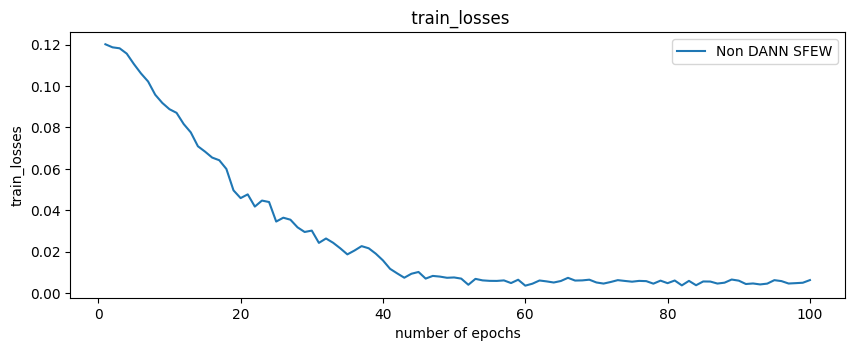

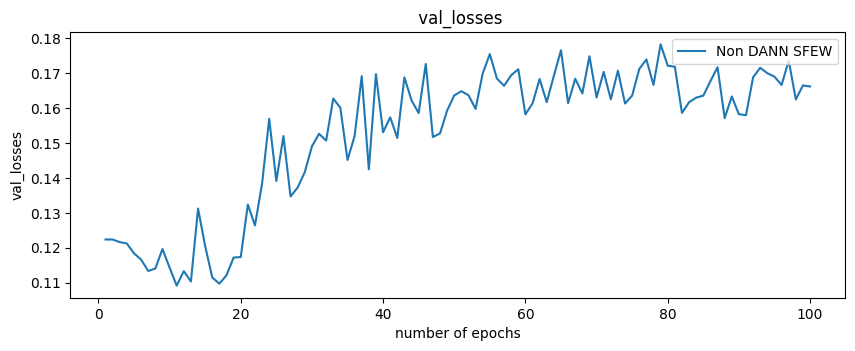

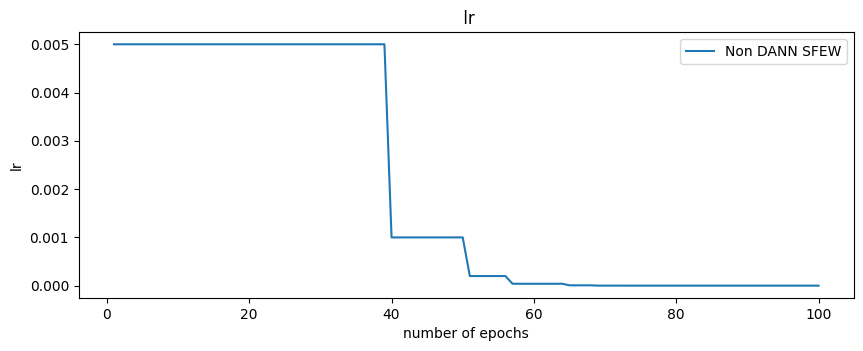

In [ ]:
plot_loss_curves(dict_non_dann_losses,mode='train_losses')
plot_loss_curves(dict_non_dann_losses,mode='val_losses')
plot_loss_curves(dict_non_dann_losses,mode='lr')

### Saving NON DANN Model

In [ ]:
MODEL_DIR = dataconfig.MODEL_DIR
NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
SPECIFIC_MODEL_DIR = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}'))
print(MODEL_DIR, NON_DANN_SFEW_DIR, SPECIFIC_MODEL_DIR)

/content/gdrive/MyDrive/CV_FER/models /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw


In [ ]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
# dataconfig = DataConfig()
# NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
if not SPECIFIC_MODEL_DIR.exists():
    # Create the directory
    SPECIFIC_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {SPECIFIC_MODEL_DIR} created successfully.')
else:
    print(f'Directory {SPECIFIC_MODEL_DIR} already exists.')

torch.save(non_dann_model.state_dict(), Path(SPECIFIC_MODEL_DIR,model_name))

Directory /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw already exists.


In [ ]:
# #@title Plotting Training and Validation Loss Function
# def plot_loss_curves(dict_non_dann_losses_list, mode = "train_losses"):
#     fig=plt.figure(figsize=(10,20))
#     fig.add_subplot(5, 1, 2)
#     # for embedding in dict_emb_file.keys():
#     list1_to_plot= dict_non_dann_losses_list[mode]
#     plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
#     plt.xlabel('number of epochs', fontsize=10)
#     plt.ylabel(str(mode), fontsize=10)
#     plt.legend(loc = 'upper right')
#     plt.title(" "+mode)
#     plt.show()

In [ ]:
# plot_loss_curves(dict_non_dann_losses_list,mode='train_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='val_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='lr')

In [ ]:
# model_name = model_name #"non_dann_sfew_19_12.pt"

## Loading NON DANN Model for DANN and DANN EWC


In [16]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # Typical - non_dann_sfew_expw_30_01.pt This may change, use specific model name if required4
model_name

'non_dann_sfew_expw_09_02.pt'

In [ ]:
# best_model_dann = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
# best_model_dann_ewc = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
# model_dann = deepcopy(non_dann_model) # saves training time - check with all
# model_dann_ewc = deepcopy(non_dann_model) # saves training time - check with all

In [17]:
# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

MODEL_PATH = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}', model_name))

loaded_model_non_dann =  DANNBespoke(num_classes=7,backbone='mobilenet', attention=False)# DANN(num_classes=7, backbone = 'resnet18') # skeleton copy
best_model_dann = DANNBespoke(num_classes=7,backbone='mobilenet', attention=False).to(device) # DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
best_model_dann_ewc = DANNBespoke(num_classes=7,backbone='mobilenet', attention=False).to(device) #DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy

loaded_model_non_dann.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))

# loaded_model_non_dann.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, model_name),map_location=torch.device(device)))
model_dann = deepcopy(loaded_model_non_dann) # saves training time - check with all
model_dann_ewc = deepcopy(loaded_model_non_dann) # saves training time - check with all


# print(model_dann)

feature extractor backbone created using mobilenet model
feature extractor backbone created using mobilenet model
feature extractor backbone created using mobilenet model


In [ ]:
# #checking if the models are same weights, i.e. copy has worked fine
# for p1, p2 in zip(non_dann_model.parameters(), model_dann.parameters()):
#     if p1.data.ne(p2.data).sum() > 0:
#         print ('False')
# print ('True')

## DANN Execution :  Training, Validating, Saving


### DANN Execution Function

In [23]:

def execute_dann(model,
                 device,
                 source_train_loader, source_val_loader,
                 target_train_loader, target_val_loader,
                 optimizer,
                 n_epochs, # total number of epochs (different from individual epoch)
                 class_loss_function = nn.CrossEntropyLoss(),
                 domain_loss_function = nn.BCEWithLogitsLoss(),
                 scheduler = None,
                 early_stop_patience = None,
                 early_stop_difference = None
                 ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr =[] # to capture lr over epochs
    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    model = model.to(device)

    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_val_acc = 0 # Initialize variable to track best accuracy
    best_model_state = None # Initialize variables to track the best model state


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter (target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}


            loss_source_class = class_loss_function(source_class_outputs, source_labels) # calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device)  # Target Image == [0., 1.]
            # print(f' target domain input shape {target_domain_inputs.shape}, output shape {target_domain_outputs.shape}')

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)

            # after 10 batches
            if (batch_idx % 10 == 0):
                print("Epoch[{}/{}] Step[{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.2f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #Scheduler
        if scheduler:
          scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)

        # # Check if the current model has the best validation loss
        # print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        # if avg_val_task_loss < best_val_loss:
        #   best_val_loss = avg_val_task_loss
        #   # save the current model state as the best model state
        #   best_model_state = deepcopy(model.state_dict())
        #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

        # check if the current model has the best accuracy
        print (f'last correct ={correct} | best correct = {best_val_acc}')
        if correct > best_val_acc:
          best_val_acc = correct
          # save the current model state as the best model state
          best_model_state = deepcopy(model.state_dict())
          print(f'Updated the best model with correct: {correct}\n')



        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(val_losses,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch+1}---')
            epoch_converge = epoch+1
            break # break from epoch loop


    # Testing when the training is over - completed or early stopped
    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    correct, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    dict_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'lr':list_lr}

    print(f'alpha list \n {list_alpha}')
    return model, dict_dann_losses





In [24]:
runconfig = RunConfig()
lr_dann = runconfig.inital_lr
lr_dann = lr_dann #/ 5.0 # OVERRIDE
optimizer_dann = optim.SGD(model_dann.parameters(), lr = lr_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer_dann,
                              mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

print(f'------------training started for DANN Model ------------------')

dann_model_trained, dict_dann_losses = execute_dann(model=model_dann,
                                                    device=device,
                                                    source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                    source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                    target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                    target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                    optimizer = optimizer_dann,
                                                    n_epochs = n_epochs,
                                                    class_loss_function = runconfig.criterion_class,
                                                    domain_loss_function = runconfig.criterion_domain,
                                                    scheduler = scheduler,
                                                    early_stop_patience = early_stop_patience,
                                                    early_stop_difference = early_stop_difference
                                                    )

------------training started for DANN Model ------------------
epoch = 1...in DANN execution function


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch[1/100] Step[1/41]: loss_total=1.4262 / domain_loss_target=0.7112 / domain_loss_source=0.6827 / task_loss=0.0323 / domain_loss=0.7150 / alpha=0.00 / lr=0.005000
Epoch[1/100] Step[11/41]: loss_total=1.5305 / domain_loss_target=0.7008 / domain_loss_source=0.6770 / task_loss=0.1526 / domain_loss=0.8296 / alpha=0.01 / lr=0.005000
Epoch[1/100] Step[21/41]: loss_total=1.5323 / domain_loss_target=0.7077 / domain_loss_source=0.6809 / task_loss=0.1437 / domain_loss=0.8247 / alpha=0.02 / lr=0.005000
Epoch[1/100] Step[31/41]: loss_total=1.4869 / domain_loss_target=0.7021 / domain_loss_source=0.6782 / task_loss=0.1066 / domain_loss=0.7848 / alpha=0.04 / lr=0.005000
Test / Val: Average loss: 0.1693, Accuracy: 170/419 (40.57%)

last correct =170 | best correct = 0
Updated the best model with correct: 170

epoch = 2...in DANN execution function
Epoch[2/100] Step[1/41]: loss_total=1.8344 / domain_loss_target=0.6988 / domain_loss_source=0.6728 / task_loss=0.4628 / domain_loss=1.1356 / alpha=0.05 /

In [25]:
# dict_dann_losses

### DANN Plotting and Validation

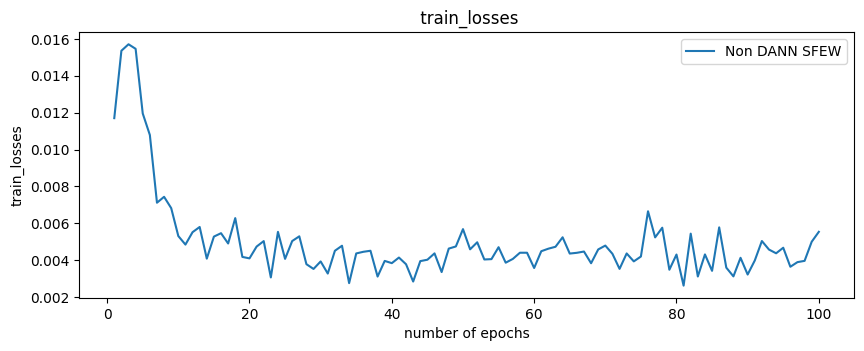

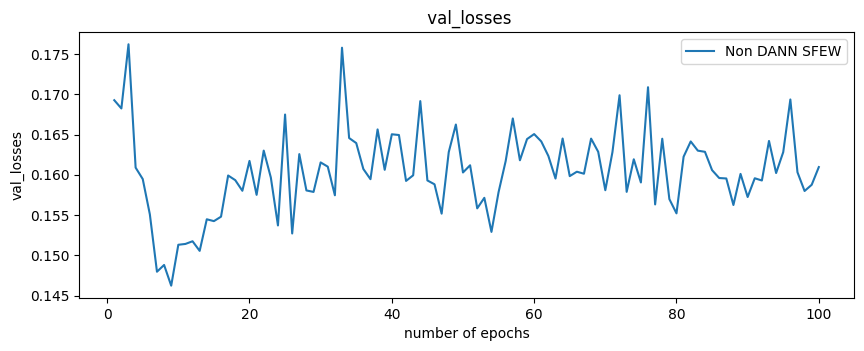

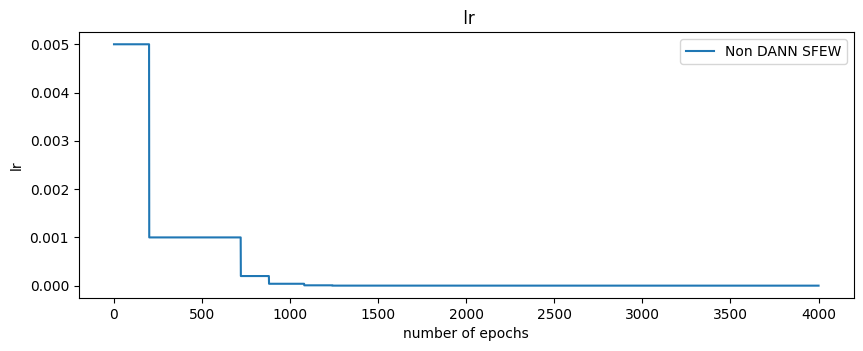

In [26]:
plot_loss_curves(dict_dann_losses,mode='train_losses')
plot_loss_curves(dict_dann_losses,mode='val_losses')
plot_loss_curves(dict_dann_losses,mode='lr')
# plot_loss_curves(dict_dann_losses,mode='list_alpha')


### Saving DANN Model

In [27]:
model_dann

DANNBespoke(
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=

In [28]:
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR
MODEL_DIR

PosixPath('/content/gdrive/MyDrive/CV_FER/models')

In [29]:

dann_model_name = f'dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # "dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(dann_model_name)

# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'dann_{source_name}_{target_name}'))
# try:
#     DANN_SFEW_EXPW_DIR = Path(dataconfig_1.DANN_SFEW_EXPW_DIR)
# except:
#     DANN_SFEW_EXPW_DIR =Path(dataconfig_1.MODEL_DIR,"dann_sfew_expw")


if not DANN_MODEL_DIR.exists():
    # Create the directory
    DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {DANN_MODEL_DIR} already exists.')


try:
    torch.save(model_dann.state_dict(), Path(DANN_MODEL_DIR,dann_model_name))
    print(f'{dann_model_name} SAVED at {Path(DANN_MODEL_DIR,dann_model_name)}!')
except:
    print(f'Problem in saving {dann_model_name}, NOT SAVED!')


dann_sfew_expw_09_02.pt
Directory /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw already exists.
dann_sfew_expw_09_02.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw/dann_sfew_expw_09_02.pt!


## DANN EWC : Training, Validating, Saving

In [30]:
# dataconfig_inference = DataConfig()

# # NON DANN
# non_dann_model_sfew_name = 'non_dann_sfew_20_01.pt'
# non_dann_model_inference = DANN(num_classes=7) # skeleton copy
# NON_DANN_SFEW_DIR = dataconfig_inference.NON_DANN_SFEW_DIR # Path(self.MODEL_DIR,"non_dann_sfew")

# try:
#     non_dann_model.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, non_dann_model_sfew_name),
#                                                         map_location=torch.device(device)))
#     print(f'{non_dann_model_sfew_name} locked and loaded')
# except:
#     print(f' problem in loading {non_dann_model_sfew_name}')


In [31]:
# model_dann_ewc = non_dann_model # saves training time - check with all


In [32]:
model_dann_ewc

DANNBespoke(
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=

### EWC Code
Regularization Penalty

In [33]:

from torch.autograd import Variable
from torch.autograd import Function
from da_cv_fer.run_config import RunConfig

runconfig = RunConfig()
def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

class EWC(object):
    def __init__(self, model: nn.Module,
                 data_loader: torch.utils.data.DataLoader
                #  dataset: list
                 ,device=device
                 , class_loss_function = runconfig.criterion_class):

        self.model = model
        # print("----------MODEL--------\n",self.model)
        self.dataset = data_loader
        self.device = device
        self.class_loss_function = class_loss_function

        # creating dictionary of params which required grad
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}

        self._means = {}
        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

        # print("--------self._means----------------\n", self._means)

        self._precision_matrices = self._diag_fisher()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)
        # print("--------PRECISION MATRICES----------------\n", precision_matrices)

        self.model.eval()
        for batch in self.dataset:
            self.model.zero_grad()
            images, labels  = variable(batch[0].to(device)), variable(batch[1].to(device))
            class_ouputs, _ , _ = model(images) # class_output, domain_output, features
            task_loss =  self.class_loss_function(class_ouputs,labels)
            task_loss.backward() # only calculating the gradients, not updating it
            # print("--------task loss----------------\n", task_loss)

            for n, p in self.model.named_parameters():
              # if type(p.grad)
              if isinstance(p.grad, type(None)):
                pass # parameter value would remain as it is
              else:
                # print(n,":", type(p.grad))
                precision_matrices[n].data += p.grad.data ** 2 / len(self.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

**DANN EWC Object.**

In [34]:
# ewc_object = EWC(deepcopy(model_dann_ewc),
#                  data_loader=data_loader['source']['train'],#sfew_train_loader,
#                  device=device,
#                  class_loss_function=runconfig.criterion_class)

### DANN EWC Execution (training and testing) Function without Learning rate
Training Function

In [35]:
def execute_dann_ewc(model,
                     device,
                     source_train_loader, source_val_loader,
                     target_train_loader, target_val_loader,
                     optimizer,
                     n_epochs, # total number of epochs (different from individual epoch)
                     class_loss_function = nn.CrossEntropyLoss(),
                     domain_loss_function = nn.BCEWithLogitsLoss(),
                     EWC_LAMBDA = 0.4, # to understand regularlization
                     scheduler = None,
                     early_stop_patience = None,
                     early_stop_difference = None
                     ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr = [] # to capture lr changes across epochs
    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    existing_model = deepcopy(model)
    model = deepcopy(model).to(device) # copies params from existing model to another one https://discuss.pytorch.org/t/copying-weights-from-one-net-to-another/1492/2
    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]
    #TODO: Scheduler
    # scheduler = ReduceLROnPlateau(optimizer, factor = 0.1, patience = 5, threshold =  0.0005, verbose = True)

    ewc_object = EWC(deepcopy(model),
                     data_loader=source_train_loader,
                     device=device,
                     class_loss_function=class_loss_function) # instantiating EWC object, we would use this object for understanding penalty


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_model_state = None # Initialize variables to track the best model state
    best_val_acc = 0 # Initialize variables to track the best accuracy


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in EWC DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter(target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            # Calculating source class loss, regularlized by EWC
            loss_source_class = class_loss_function(source_class_outputs, source_labels) + EWC_LAMBDA * ewc_object.penalty(model)# calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device) # Target Image == [0., 1.]

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)


            # after 10 batches
            if (batch_idx % 50 == 0):
                print("Epoch [{}/{}] Step [{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.4f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #Scheduler
        if scheduler:
          scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)

        # # Check if the current model has the best validation loss
        # print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        # if avg_val_task_loss < best_val_loss:
        #   best_val_loss = avg_val_task_loss
        #   # save the current model state as the best model state
        #   best_model_state = deepcopy(model.state_dict())
        #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

        # check if the current model has the best accuracy
        print (f'last correct ={correct} | best correct = {best_val_acc}')
        if correct > best_val_acc:
          best_val_acc = correct
          # save the current model state as the best model state
          best_model_state = deepcopy(model.state_dict())
          print(f'Updated the best model with correct: {correct}\n')

        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(val_losses,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch+1}---')
            epoch_converge = epoch+1
            break # break from epoch loop

    # Testing when the training is over - completed or early stopped

    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct_source, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    accuracy_source = correct_source / len(source_val_loader.dataset)

    correct_target, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    accuracy_target = correct_target / len(target_val_loader.dataset)


    dict_ewc_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'test_accuracy_source' : accuracy_source,
                        'test_accuracy_target':accuracy_target,
                            'lr':list_lr}

    print(f'alpha list \n {list_alpha}')
    return model, dict_ewc_dann_losses





### DANN EWC Execute

In [37]:
runconfig = RunConfig()
lr_ewc_dann = runconfig.inital_lr #/5.0 #override
optimizer_ewc_dann = optim.SGD(model_dann.parameters(), lr = lr_ewc_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS
# n_epochs = 5 # override

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer_ewc_dann,
                              mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

try:
    EWC_LAMBDA = runconfig.EWC_LAMBDA
except:
    EWC_LAMBDA = 0.4

print(EWC_LAMBDA)

print(f'------------training started for EWC DANN Model ------------------')

ewc_dann_model , dict_ewc_dann_losses = execute_dann_ewc(model=model_dann,
                                                          device=device,
                                                          source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                          source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                          target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                          target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                          optimizer = optimizer_ewc_dann,
                                                          n_epochs = n_epochs,
                                                          class_loss_function = runconfig.criterion_class,
                                                          domain_loss_function = runconfig.criterion_domain,
                                                          EWC_LAMBDA=EWC_LAMBDA, # Hyperparameter about penalty relevance
                                                          scheduler = None,
                                                          early_stop_patience = None,
                                                          early_stop_difference = None)

0.4
------------training started for EWC DANN Model ------------------


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


epoch = 1...in EWC DANN execution function
Epoch [1/100] Step [1/41]: loss_total=1.3267 / domain_loss_target=0.6814 / domain_loss_source=0.6367 / task_loss=0.0086 / domain_loss=0.6453 / alpha=0.0000 / lr=0.005000
Test / Val: Average loss: 0.1564, Accuracy: 187/419 (44.63%)

last correct =187 | best correct = 0
Updated the best model with correct: 187

epoch = 2...in EWC DANN execution function
Epoch [2/100] Step [1/41]: loss_total=1.3700 / domain_loss_target=0.6742 / domain_loss_source=0.6400 / task_loss=0.0558 / domain_loss=0.6958 / alpha=0.0500 / lr=0.005000
Test / Val: Average loss: 0.1588, Accuracy: 187/419 (44.63%)

last correct =187 | best correct = 187
epoch = 3...in EWC DANN execution function
Epoch [3/100] Step [1/41]: loss_total=1.6443 / domain_loss_target=0.6994 / domain_loss_source=0.6284 / task_loss=0.3165 / domain_loss=0.9449 / alpha=0.0997 / lr=0.005000
Test / Val: Average loss: 0.1556, Accuracy: 190/419 (45.35%)

last correct =190 | best correct = 187
Updated the best m

### DANN EWC Plotting and Validation

In [38]:
dict_ewc_dann_losses['test_loss_source'], dict_ewc_dann_losses['test_loss_target']

(0.1554608155833224, 0.5661545080297133)

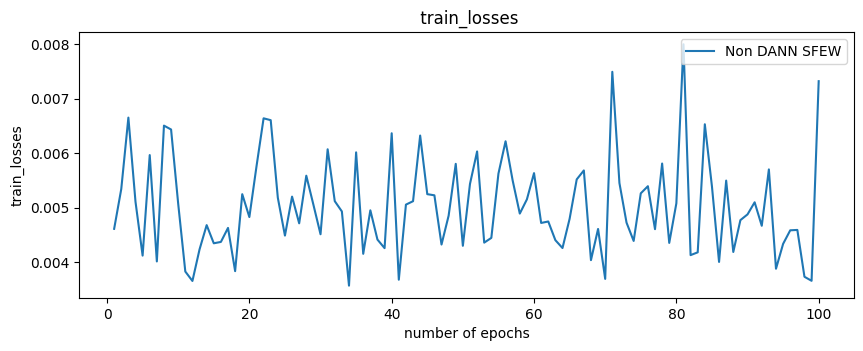

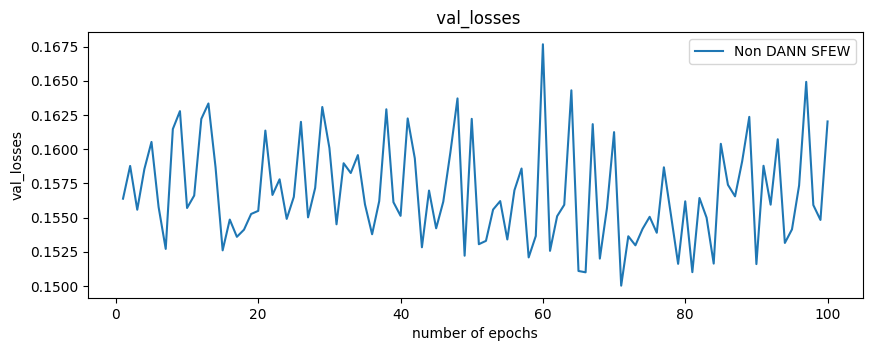

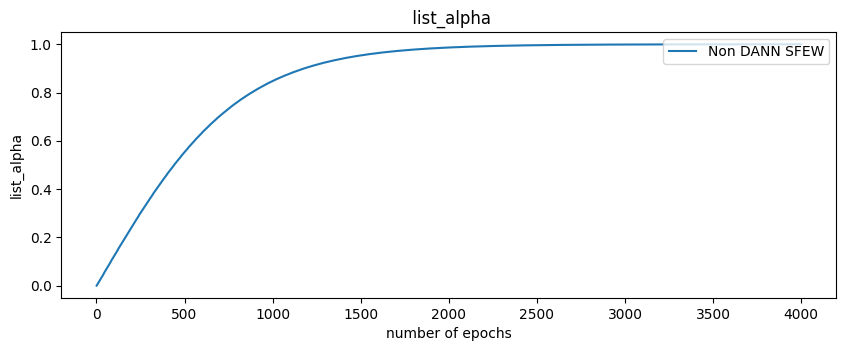

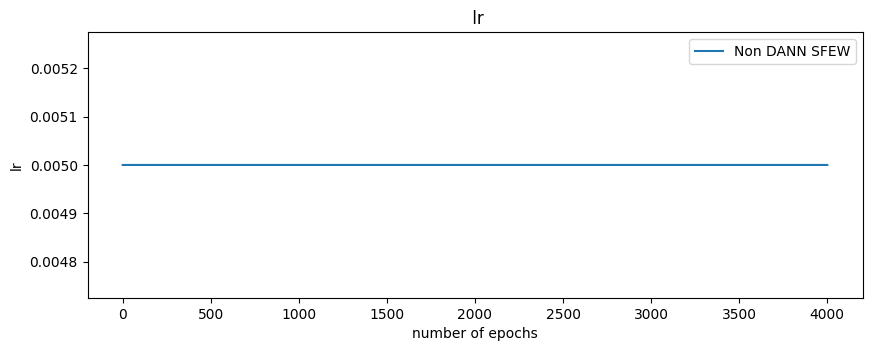

In [39]:
plot_loss_curves(dict_ewc_dann_losses,mode='train_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='val_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='list_alpha')
plot_loss_curves(dict_ewc_dann_losses,mode='lr')

### Saving DANN EWC Model

In [40]:
# ewc_dann_model_name = 'ewc_dann_sfew_expw_30_01.pt'
ewc_dann_model_name = f'ewc_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"ewc_dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(ewc_dann_model_name)

from da_cv_fer.data_config import DataConfig
dataconfig_2 = DataConfig()
MODEL_DIR = dataconfig_2.MODEL_DIR


EWC_DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'ewc_dann_{source_name}_{target_name}'))
# try:
#     EWC_DANN_SFEW_EXPW_DIR = Path(dataconfig_2.EWC_DANN_SFEW_EXPW_DIR)
# except:
#     EWC_DANN_SFEW_EXPW_DIR =Path(dataconfig_2.MODEL_DIR,"ewc_dann_sfew_expw")


if not EWC_DANN_MODEL_DIR.exists():
    # Create the directory
    EWC_DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {EWC_DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {EWC_DANN_MODEL_DIR} already exists.')

try:
    torch.save(ewc_dann_model.state_dict(), Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name))
    print(f'{ewc_dann_model_name} SAVED at {Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name)}!')
except:
    print(f'Problem in saving {ewc_dann_model_name}, NOT SAVED!')


ewc_dann_sfew_expw_09_02.pt
Directory /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw already exists.
ewc_dann_sfew_expw_09_02.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw/ewc_dann_sfew_expw_09_02.pt!
